In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

In [2]:
# %pip install -U scikit-learn

In [3]:
priority_indicators = pd.read_csv("CCRI.csv")
priority_indicators.head()

,Community name,% of people aged >65 and < 5 years old,% Visible minority population,% Aboriginal identity,% one parent families,% Living alone,% Women,% Newcomers to community (Mobility Status - movers from 2015-2016),% Recent immigrant (2011-2016) and non permanent residents,% Language (neither FR or EN),"% Low education (No certificate, diploma or degree)","% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",% Low income and aged 65+,% Unemployed,Public transit access,% Area of tree canopy (2020),% paved area,High income households,Resident count
0,01B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.024415,0.260229,NaN,0.0
1,01C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.089814,0.166706,NaN,0.0
2,01F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.031109,0.133990,85.0,0.0
3,01H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.059726,0.019455,NaN,0.0
4,01I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.209101,0.000043,NaN,0.0


In [4]:
canopy_data = gpd.read_file("Tree_canopy.geojson")
canopy_data = canopy_data[["name","2020","geometry"]]
canopy_data.head()

,name,2020,geometry
0,12I,4.26,"POLYGON ((-113.94716 50.86311, -113.94563 50.8..."
1,SETON,1.25,"POLYGON ((-113.92931 50.87049, -113.92922 50.8..."
2,RANGEVIEW,0.43,"POLYGON ((-113.93383 50.88507, -113.93363 50.8..."
3,12J,1.33,"POLYGON ((-113.85991 50.85775, -113.86006 50.8..."
4,AUBURN BAY,3.61,"POLYGON ((-113.96582 50.88044, -113.97371 50.8..."


In [5]:
columns = [
    "Community name",
    "% of people aged >65 and < 5 years old",
    "% Visible minority population",
    "% Language (neither FR or EN)",
    "% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",
    "% Unemployed",
    "% Area of tree canopy (2020)"
]
columns

['Community name',
 '% of people aged >65 and < 5 years old',
 '% Visible minority population',
 '% Language (neither FR or EN)',
 '% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+',
 '% Unemployed',
 '% Area of tree canopy (2020)']

In [6]:
priority_indicators = priority_indicators[columns]
priority_indicators.head()

,Community name,% of people aged >65 and < 5 years old,% Visible minority population,% Language (neither FR or EN),"% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",% Unemployed,% Area of tree canopy (2020)
0,01B,NaN,NaN,NaN,NaN,NaN,0.024415
1,01C,NaN,NaN,NaN,NaN,NaN,0.089814
2,01F,NaN,NaN,NaN,NaN,NaN,0.031109
3,01H,NaN,NaN,NaN,NaN,NaN,0.059726
4,01I,NaN,NaN,NaN,NaN,NaN,0.209101


In [7]:
rename={
     "Community name":"name",
    "% of people aged >65 and < 5 years old":"age",
    "% Visible minority population":"visible_minority",
    "% Language (neither FR or EN)":"language",
    "% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+":"low_income",
    "% Unemployed":"unemployed",
    "% Area of tree canopy (2020)":"canopy"
}

In [8]:
priority_indicators = priority_indicators.rename(columns=rename)

In [9]:
priority_indicators = priority_indicators.dropna()
priority_indicators.head()

,name,age,visible_minority,language,low_income,unemployed,canopy
45,ABBEYDALE,0.149068,0.466678,0.031056,0.074702,0.065469,0.033019
46,ACADIA,0.230798,0.207224,0.013783,0.091730,0.071293,0.051684
47,ALBERT PARK/RADISSON HEIGHTS,0.171645,0.447335,0.017150,0.113620,0.076461,0.032291
49,ALTADORE,0.145203,0.115961,0.002161,0.051858,0.043215,0.069671
52,APPLEWOOD PARK,0.155135,0.700473,0.065177,0.058731,0.055150,0.019549


In [10]:
df= canopy_data.merge(priority_indicators, left_on='name', right_on='name')

In [11]:
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy
0,AUBURN BAY,3.61,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791
1,MAHOGANY,1.24,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275
2,COPPERFIELD,3.68,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343
3,NEW BRIGHTON,3.70,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369
4,SILVERADO,4.53,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195


In [12]:
df["2020"] = df["2020"]/100
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195


In [13]:
df["canopy_diff"] = (0.16-df["2020"]).clip(lower=0)

In [14]:
df.sort_values(by='canopy_diff', ascending=False).head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff
159,CITYSCAPE,0.0036,"POLYGON ((-113.95250 51.14699, -113.94675 51.1...",0.150129,0.515464,0.035438,0.051546,0.027384,0.001423,0.1564
161,REDSTONE,0.0063,"POLYGON ((-113.94637 51.16826, -113.94637 51.1...",0.166382,0.340287,0.023940,0.013680,0.029925,0.002513,0.1537
160,SKYVIEW RANCH,0.0108,"POLYGON ((-113.94675 51.15430, -113.94675 51.1...",0.153754,0.553088,0.035022,0.032032,0.041001,0.003644,0.1492
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476
194,NOLAN HILL,0.0181,"POLYGON ((-114.15187 51.16802, -114.15213 51.1...",0.138175,0.309793,0.009327,0.013324,0.028648,0.005524,0.1419


In [15]:
priority_columns=[
    "age",
    "visible_minority",
    "language",
    "low_income",
    "unemployed"
]

priority_columns_norm=[
    "age_norm",
    "visible_minority_norm",
    "language_norm",
    "low_income_norm",
    "unemployed_norm"
]

In [16]:
scaler = MinMaxScaler()
df[priority_columns_norm] = scaler.fit_transform(df[priority_columns])

In [17]:
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791,0.1239,0.224745,0.212864,0.042787,0.129891,0.143199
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476,0.281338,0.190478,0.056259,0.066923,0.089764
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343,0.1232,0.184898,0.259885,0.063220,0.127414,0.296768
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369,0.1230,0.183116,0.339047,0.071293,0.140434,0.255927
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195,0.1147,0.193772,0.406309,0.165334,0.164832,0.308139


In [18]:
def priority_index(x):
    return 0.1 + (1-.1)*((x["age_norm"]+x["visible_minority_norm"]+x["language_norm"]+x["low_income_norm"]+x["unemployed_norm"])/5)

In [19]:
df["priority"]=df.apply(priority_index, axis=1)

In [20]:
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm,priority
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791,0.1239,0.224745,0.212864,0.042787,0.129891,0.143199,0.235628
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476,0.281338,0.190478,0.056259,0.066923,0.089764,0.223257
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343,0.1232,0.184898,0.259885,0.063220,0.127414,0.296768,0.267793
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369,0.1230,0.183116,0.339047,0.071293,0.140434,0.255927,0.278167
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195,0.1147,0.193772,0.406309,0.165334,0.164832,0.308139,0.322910


In [21]:
df["canopy_score"] = (df["canopy_diff"]/df["canopy_diff"].max())

In [22]:
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm,priority,canopy_score
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791,0.1239,0.224745,0.212864,0.042787,0.129891,0.143199,0.235628,0.792199
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476,0.281338,0.190478,0.056259,0.066923,0.089764,0.223257,0.943734
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343,0.1232,0.184898,0.259885,0.063220,0.127414,0.296768,0.267793,0.787724
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369,0.1230,0.183116,0.339047,0.071293,0.140434,0.255927,0.278167,0.786445
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195,0.1147,0.193772,0.406309,0.165334,0.164832,0.308139,0.322910,0.733376


In [23]:
def equity_index(x):
    return (1-(x["canopy_score"]*x["priority"]))*100


In [24]:
df["index"] = df.apply(equity_index, axis=1)

In [25]:
df.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm,priority,canopy_score,index
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791,0.1239,0.224745,0.212864,0.042787,0.129891,0.143199,0.235628,0.792199,81.333592
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476,0.281338,0.190478,0.056259,0.066923,0.089764,0.223257,0.943734,78.930463
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343,0.1232,0.184898,0.259885,0.063220,0.127414,0.296768,0.267793,0.787724,78.905271
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369,0.1230,0.183116,0.339047,0.071293,0.140434,0.255927,0.278167,0.786445,78.123676
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195,0.1147,0.193772,0.406309,0.165334,0.164832,0.308139,0.322910,0.733376,76.318585


In [26]:
df.sort_values(by='index', ascending=True).tail()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm,priority,canopy_score,index
22,OGDEN,0.2241,"POLYGON ((-114.01172 50.99868, -114.00999 50.9...",0.197411,0.155084,0.005830,0.087453,0.054221,0.063198,0.0,0.345930,0.160786,0.035138,0.459781,0.352623,0.343766,0.0,100.0
98,SOUTH CALGARY,0.2105,"POLYGON ((-114.09469 51.02354, -114.09469 51.0...",0.134399,0.164340,0.011256,0.082170,0.037145,0.057489,0.0,0.188830,0.170382,0.067839,0.432005,0.186786,0.288252,0.0,100.0
99,UPPER MOUNT ROYAL,0.4694,"POLYGON ((-114.08742 51.03593, -114.08721 51.0...",0.213479,0.159403,0.006053,0.068604,0.044391,0.128345,0.0,0.385989,0.165263,0.036482,0.360680,0.257151,0.317002,0.0,100.0
101,BANKVIEW,0.2120,"POLYGON ((-114.10424 51.03783, -114.10358 51.0...",0.089612,0.203577,0.007610,0.147451,0.068493,0.079179,0.0,0.077168,0.211061,0.045866,0.775213,0.491232,0.388097,0.0,100.0
97,ELBOW PARK,0.6941,"POLYGON ((-114.07481 51.03003, -114.07465 51.0...",0.195990,0.064333,0.000000,0.028426,0.044883,0.120536,0.0,0.342388,0.066698,0.000000,0.149449,0.261935,0.247685,0.0,100.0


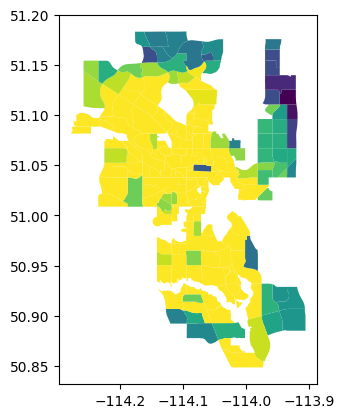

In [27]:
df.plot(column="index");

In [30]:
final_index = df[["geometry","name","priority","index"]+priority_columns+priority_columns_norm]
final_index.head()

,geometry,name,priority,index,age,visible_minority,language,low_income,unemployed,age_norm,visible_minority_norm,language_norm,low_income_norm,unemployed_norm
0,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",AUBURN BAY,0.235628,81.333592,0.148804,0.205316,0.007099,0.024706,0.032657,0.224745,0.212864,0.042787,0.129891,0.143199
1,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",MAHOGANY,0.223257,78.930463,0.171504,0.183724,0.009335,0.012729,0.027155,0.281338,0.190478,0.056259,0.066923,0.089764
2,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",COPPERFIELD,0.267793,78.905271,0.132822,0.250669,0.010490,0.024235,0.048470,0.184898,0.259885,0.063220,0.127414,0.296768
3,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",NEW BRIGHTON,0.278167,78.123676,0.132107,0.327024,0.011829,0.026711,0.044265,0.183116,0.339047,0.071293,0.140434,0.255927
4,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",SILVERADO,0.322910,76.318585,0.136381,0.391901,0.027433,0.031352,0.049641,0.193772,0.406309,0.165334,0.164832,0.308139


In [31]:
final_index.to_file("equity_index_5.geojson", driver="GeoJSON")  